In [103]:
import sklearn

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd


In [105]:
df = pd.read_excel('Sensor_data.xlsx',  parse_dates=['Time'])
df

,Time,Data
0,0,0.172290
1,1,0.172290
2,2,0.171429
3,3,0.166370
4,4,0.161579
...,...,...
148235,148235,0.526532
148236,148236,0.524218
148237,148237,0.521392
148238,148238,0.518028


In [106]:
df.shape

(148240, 2)

<Axes: >

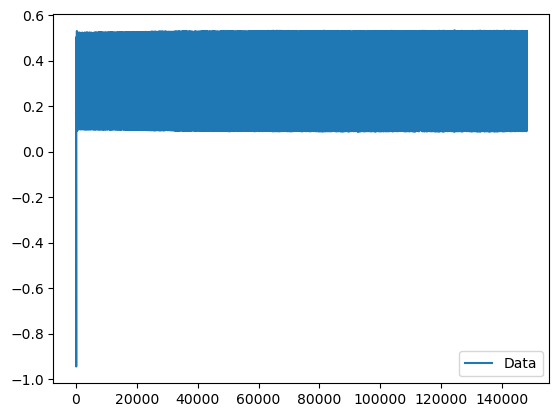

In [107]:
df.plot(label ='Data')

In [108]:
train_size = int(len(df)*0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(118592, 2) (29648, 2)


In [109]:
train_size

118592

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['Data']])

train['Data'] = scaler.transform(train[['Data']])
test['Data'] = scaler.transform(test[['Data']])

C:\Users\vikne\AppData\Local\Temp\ipykernel_12776\1552361078.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikne\AppData\Local\Temp\ipykernel_12776\1552361078.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
TIME_STEPS=50
lookback = 50
def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['Data']], train[['Data']])
X_test, y_test = create_sequences(test[['Data']], test[['Data']])

In [112]:
X_train.shape

(118542, 50, 1)

In [113]:
X_test.shape

(29598, 50, 1)

In [114]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from keras.models import Model

learning_rate = 0.001  # Adjust the learning rate as needed

optimizer = Adam(learning_rate=learning_rate)

epochs = 40
batch = 256

In [115]:
subsequences = 2
timesteps = X_train.shape[1]//subsequences

X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
X_test_series_sub = X_test.reshape((X_test.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Train set shape', X_test_series_sub.shape)


Train set shape (118542, 2, 25, 1)
Train set shape (29598, 2, 25, 1)


In [116]:
model_cnn_lstm = keras.Sequential()
model_cnn_lstm.add(TimeDistributed(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_series_sub.shape[2], X_train_series_sub.shape[3]))))
model_cnn_lstm.add(TimeDistributed(layers.MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(layers.Flatten()))
model_cnn_lstm.add(layers.LSTM(16, activation='tanh'))
model_cnn_lstm.add(layers.Dense(16))
model_cnn_lstm.add(layers.Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=optimizer)


In [117]:
#model.fit([x_train_cnn, x_train_lstm], y_train, epochs=10, batch_size=32)
#history = model.fit([X_train, X_train], y_train, epochs=35, batch_size=70, validation_split=0.1, shuffle=False, verbose=1)


#cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, validation_split=0.1, shuffle=False, epochs=30, verbose=2)
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, validation_split=0.1, shuffle=False, epochs=30, batch_size=32,verbose=2, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')])



Epoch 1/30
3334/3334 - 55s - loss: 0.0431 - val_loss: 0.0096 - 55s/epoch - 16ms/step
Epoch 2/30
3334/3334 - 40s - loss: 0.0181 - val_loss: 0.0091 - 40s/epoch - 12ms/step
Epoch 3/30
3334/3334 - 37s - loss: 0.0182 - val_loss: 0.0075 - 37s/epoch - 11ms/step
Epoch 4/30
3334/3334 - 36s - loss: 0.0150 - val_loss: 0.0067 - 36s/epoch - 11ms/step
Epoch 5/30
3334/3334 - 37s - loss: 0.0177 - val_loss: 0.0066 - 37s/epoch - 11ms/step
Epoch 6/30
3334/3334 - 37s - loss: 0.0137 - val_loss: 0.0066 - 37s/epoch - 11ms/step
Epoch 7/30
3334/3334 - 38s - loss: 0.0152 - val_loss: 0.0065 - 38s/epoch - 11ms/step
Epoch 8/30
3334/3334 - 39s - loss: 0.0129 - val_loss: 0.0062 - 39s/epoch - 12ms/step
Epoch 9/30
3334/3334 - 41s - loss: 0.0124 - val_loss: 0.0066 - 41s/epoch - 12ms/step
Epoch 10/30
3334/3334 - 43s - loss: 0.0098 - val_loss: 0.0063 - 43s/epoch - 13ms/step
Epoch 11/30
3334/3334 - 46s - loss: 0.0080 - val_loss: 0.0063 - 46s/epoch - 14ms/step


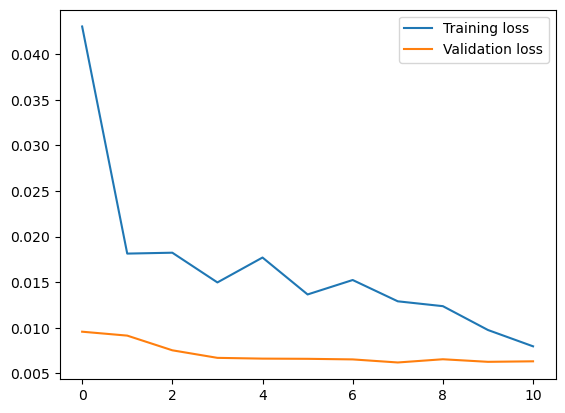

In [118]:
import matplotlib.pyplot as plt

plt.plot(cnn_lstm_history.history['loss'], label='Training loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
plt.legend()


In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
print(cnn_lstm_train_pred)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_lstm_train_pred)))

3705/3705 [==============================] - 31s 8ms/step
[[-8.126912  ]
 [-8.184692  ]
 [-8.248446  ]
 ...
 [-0.29194444]
 [-0.34212416]
 [-0.43215212]]
Train rmse: 0.08585797354505777


In [121]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_test_pred = model_cnn_lstm.predict(X_test_series_sub)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test, cnn_lstm_test_pred)))

925/925 [==============================] - 6s 6ms/step
Train rmse: 0.08585797354505777
Validation rmse: 0.07285169200313191


In [122]:
import time

start_time = time.time()

testX_1 = X_test_series_sub[0:32]
#testX_1 = X_test_series_sub

X_train_pred = model_cnn_lstm.predict(testX_1)

# End the timer
end_time = time.time()

# Calculate the inference time
inference_time = end_time - start_time
print("Inference time:", inference_time)

1/1 [==============================] - 0s 60ms/step
Inference time: 0.16894316673278809


In [123]:
X_test_pred = model_cnn_lstm.predict(X_test_series_sub)

925/925 [==============================] - 6s 6ms/step


In [124]:
model_cnn_lstm.evaluate(X_test_series_sub, y_test)

925/925 [==============================] - 6s 6ms/step - loss: 0.0053


0.005307366140186787

In [125]:
model_cnn_lstm.evaluate(X_train_series_sub, y_train)

3705/3705 [==============================] - 23s 6ms/step - loss: 0.0074


0.007371596060693264

In [126]:
plot=y_test[:,0]
pred0=X_test_pred[:,0]

In [127]:
from sklearn.metrics import r2_score,mean_squared_error
print(np.sqrt(mean_squared_error(plot,pred0)))
print(r2_score(plot,pred0))

0.07285169200313191
0.9945969301670977


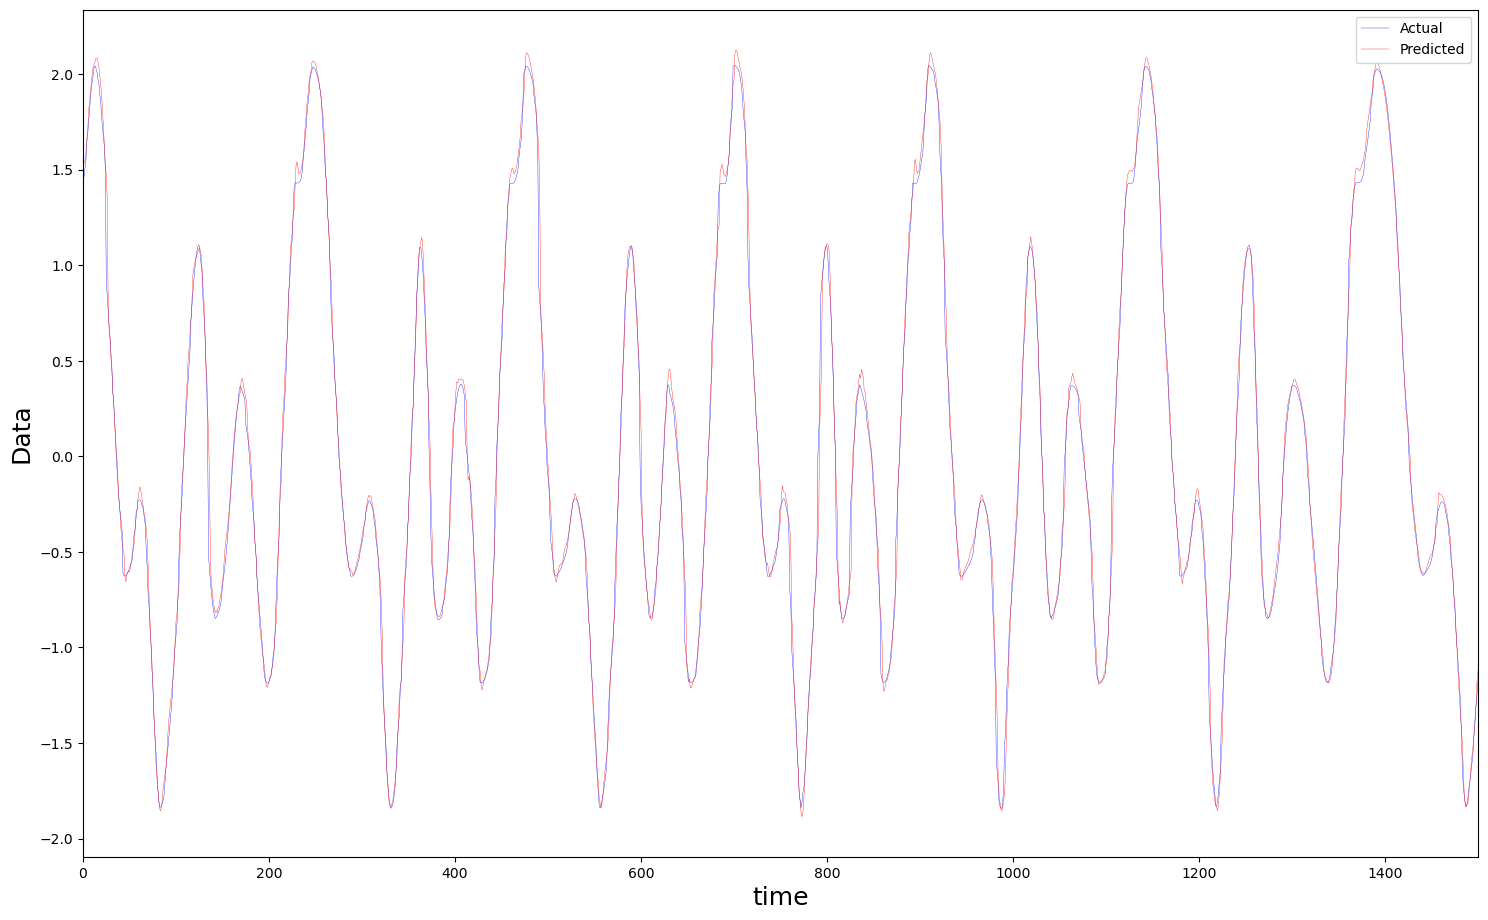

In [144]:
plt.figure(figsize=(18,11))
plt.plot(plot,label='Actual', linewidth=0.25,color='blue')
plt.plot(pred0,label='Predicted', linewidth=0.25, color='red')
plt.legend()
plt.ylabel('Data',fontsize=18)
plt.xlabel('time',fontsize=18)
# Set x-axis limits
plt.xlim(0, 1500)

plt.show()

In [129]:
model_cnn_lstm.save("model3.h5") 

c:\Users\vikne\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [130]:
from tensorflow.keras.models import load_model
model3 = load_model('model3.h5')
model = model3
tf.keras.utils.plot_model(model,to_file='model1_arc.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [131]:
X_train.shape

(118542, 50, 1)

In [132]:
# Assuming your array is called 'X_test'
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# Check the new shape
print(X_test_reshaped.shape)

(29598, 50)


In [133]:
import seaborn as sns

In [134]:
test_mae_loss = np.mean(np.abs(X_test_pred - X_test_reshaped ), axis=1)

C:\Users\vikne\AppData\Local\Temp\ipykernel_12776\3923121268.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




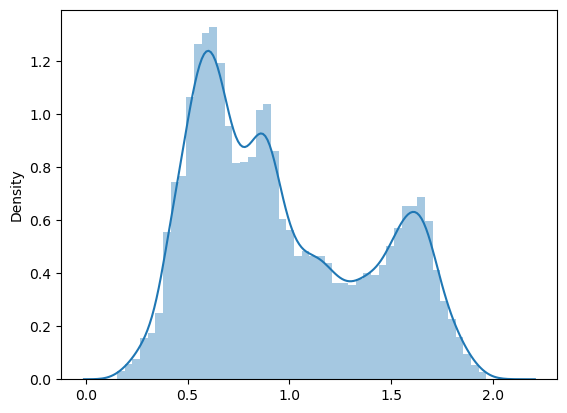

In [135]:
sns.distplot(test_mae_loss, bins=50, kde=True);

In [136]:
THRESHOLD = 0.3

test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
#test_score_df['close'] = test[timesteps:].close

In [137]:
test_score_df.head()

,Time,Data,loss,threshold,anomaly
118642,118642,1.429618,1.497722,0.3,True
118643,118643,1.459653,1.462602,0.3,True
118644,118644,1.505057,1.430950,0.3,True
118645,118645,1.535567,1.430105,0.3,True
118646,118646,1.641269,1.457301,0.3,True


In [138]:
test_score_df.tail()

,Time,Data,loss,threshold,anomaly
148235,148235,1.993157,1.279582,0.3,True
148236,148236,1.972824,1.196685,0.3,True
148237,148237,1.947991,1.110049,0.3,True
148238,148238,1.918430,1.024271,0.3,True
148239,148239,1.885557,0.940716,0.3,True


In [139]:
import plotly.graph_objects as go

In [140]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[timesteps:].Time, y=test_score_df.loss,
                    mode='lines',
                    name='Test Loss'))
fig.add_trace(go.Scatter(x=test[timesteps:].Time, y=test_score_df.threshold,
                    mode='lines',
                    name='Threshold'))
fig.update_layout(showlegend=True)
fig.show()